In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The format is known as currency units per U.S. Dollar. Explained by example, each rate in the Euro column says how much U.S. Dollar you had to pay at a certain date to buy 1 Euro. Hence, the rates in the column U.S. Dollar are always

In [2]:
df = pd.read_csv('exchangerate.csv')

In [3]:
df.head()

,Date,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,NaN,0.376,NaN,NaN,0.843,NaN,1.4035,NaN,...,3.55,50.04,7.4588,1.3168,25.10,5.8750,NaN,3.671,1.5617,1.0
2,1995-1-4,NaN,0.7704,0.376,NaN,NaN,0.844,NaN,1.4026,NaN,...,3.56,50.07,7.4480,1.3161,25.13,5.8738,NaN,3.671,1.5605,1.0
3,1995-1-5,NaN,0.7693,0.376,NaN,NaN,0.844,NaN,1.4002,NaN,...,3.55,50.07,7.4450,1.3080,25.14,5.8700,NaN,3.671,1.5610,1.0
4,1995-1-6,NaN,0.7699,0.376,NaN,NaN,0.842,NaN,1.4002,NaN,...,3.56,50.07,NaN,1.3040,25.13,5.8810,NaN,3.671,1.5645,1.0


In [4]:
df.shape

(5978, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5978 entries, 0 to 5977
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        5978 non-null   object 
 1   Algerian Dinar              1866 non-null   float64
 2   Australian Dollar           5715 non-null   float64
 3   Bahrain Dinar               5909 non-null   float64
 4   Bolivar Fuerte              2314 non-null   float64
 5   Botswana Pula               4703 non-null   float64
 6   Brazilian Real              5439 non-null   float64
 7   Brunei Dollar               4732 non-null   float64
 8   Canadian Dollar             5622 non-null   float64
 9   Chilean Peso                4758 non-null   float64
 10  Chinese Yuan                4662 non-null   float64
 11  Colombian Peso              5396 non-null   float64
 12  Czech Koruna                4128 non-null   float64
 13  Danish Krone                5727 

In [6]:
df.isnull().sum()

Date                             0
Algerian Dinar                4112
Australian Dollar              263
Bahrain Dinar                   69
Bolivar Fuerte                3664
Botswana Pula                 1275
Brazilian Real                 539
Brunei Dollar                 1246
Canadian Dollar                356
Chilean Peso                  1220
Chinese Yuan                  1316
Colombian Peso                 582
Czech Koruna                  1850
Danish Krone                   251
Euro                          1070
Hungarian Forint              1415
Icelandic Krona                354
Indian Rupee                   429
Indonesian Rupiah             1492
Iranian Rial                  1312
Israeli New Sheqel            1939
Japanese Yen                   316
Kazakhstani Tenge             3051
Korean Won                     601
Kuwaiti Dinar                 1054
Libyan Dinar                   123
Malaysian Ringgit              301
Mauritian Rupee               2460
Mexican Peso        

In [7]:
df["Indian Rupee"]

0           NaN
1       31.3700
2       31.3700
3       31.3700
4       31.3700
         ...   
5973    66.8299
5974    66.7801
5975    66.7801
5976        NaN
5977        NaN
Name: Indian Rupee, Length: 5978, dtype: float64

In [8]:
df.interpolate(inplace = True)

In [9]:
df["Indian Rupee"].isnull().sum()

1

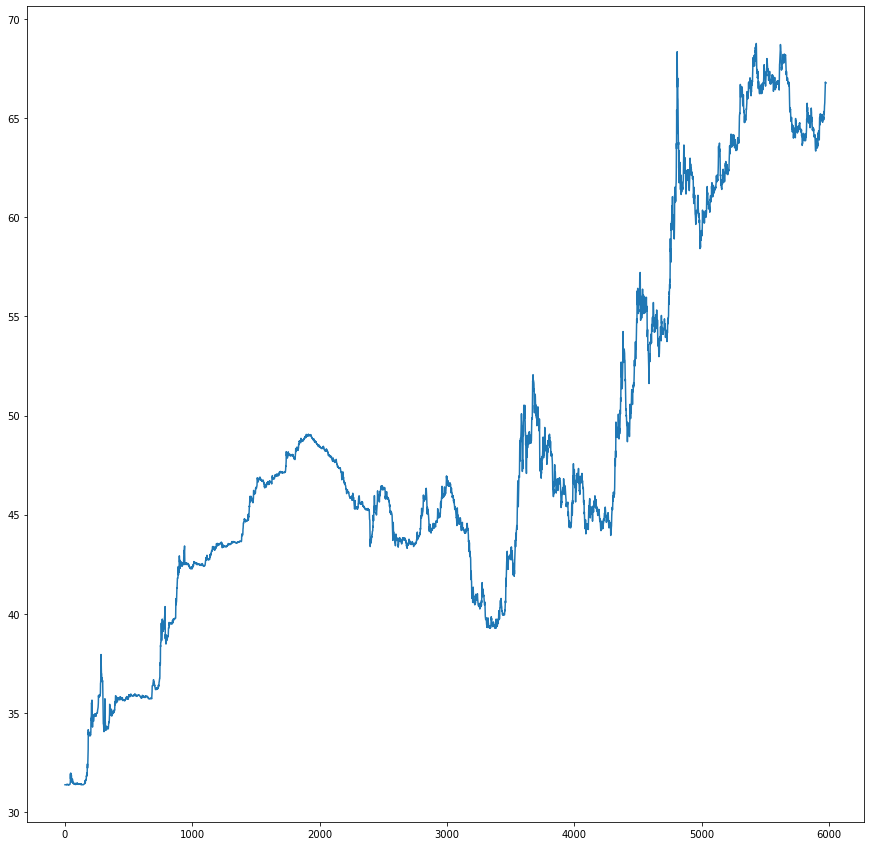

In [10]:
plt.figure(figsize = (15,15))
plt.plot(df['Indian Rupee'])

In [11]:
inr = df["Indian Rupee"]
inr[0] = 31.3700

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
inr = np.array(inr).reshape(-1,1)
inr

array([[31.37  ],
       [31.37  ],
       [31.37  ],
       ...,
       [66.7801],
       [66.7801],
       [66.7801]])

In [15]:
inr_train = inr[:4500]
inr_test = inr[4500:]

In [16]:
inr_train.shape, inr_test.shape

((4500, 1), (1478, 1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.layers.recurrent import LSTM

Using TensorFlow backend.
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\siddh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [18]:
def create_dataset( dataset, look_back ):
    dataX, dataY =[],[]
    for i in range( len(dataset) - look_back - 1 ):
        a = dataset[ i:( i+look_back ), 0 ]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [19]:
look_back=10
xtrain,ytrain=create_dataset(inr_train, look_back)
xtest,ytest=create_dataset(inr_test, look_back)
xtrain=np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))
xtest=np.reshape(xtest, (xtest.shape[0],xtest.shape[1],1))

In [20]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(xtrain.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
from sklearn.metrics import mean_squared_error
model.compile(optimizer = 'adam', loss ='mse')
model.fit(xtrain,ytrain, epochs= 50, batch_size=1,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
4489/4489 [==============================] - 33s 7ms/step - loss: 12.9663
Epoch 2/50
4489/4489 [==============================] - 31s 7ms/step - loss: 0.1083
Epoch 3/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0940
Epoch 4/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0804
Epoch 5/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0728
Epoch 6/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0695
Epoch 7/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0718
Epoch 8/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0729
Epoch 9/50
4489/4489 [==============================] - 31s 7ms/step - loss: 0.0682
Epoch 10/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0651
Epoch 11/50
4489/4489 [==============================] - 32s 7ms/step - loss: 0.0659
Epoch 12/50
4489/4489 [==

In [23]:
prediction = model.predict(xtest)
prediction[:20]

array([[56.10292 ],
       [56.066338],
       [55.95193 ],
       [56.277737],
       [56.158195],
       [56.64316 ],
       [57.08913 ],
       [56.798367],
       [57.280178],
       [57.38679 ],
       [57.235023],
       [56.76506 ],
       [56.10753 ],
       [55.381977],
       [55.493267],
       [55.76068 ],
       [56.240532],
       [56.077   ],
       [55.761623],
       [56.003895]], dtype=float32)

In [24]:
ytest = np.array(ytest)
ytest[:20]

array([55.76, 55.6 , 56.01, 55.86, 56.42, 56.99, 56.53, 57.07, 57.22,
       56.92, 56.31, 55.56, 54.81, 55.03, 55.42, 56.02, 55.81, 55.37,
       55.7 , 55.66])

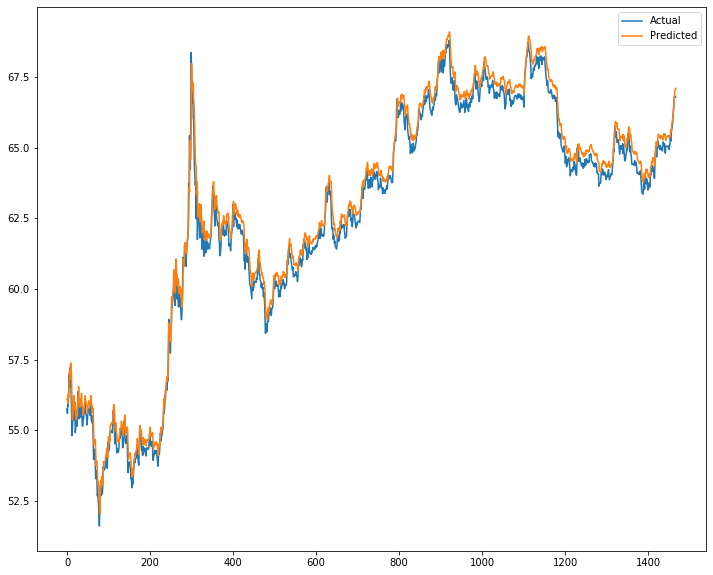

In [25]:
plt.figure(figsize = (12,10))
plt.plot(ytest, label = 'Actual')
plt.plot(prediction, label = 'Predicted')
plt.legend()